# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [147]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [7]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

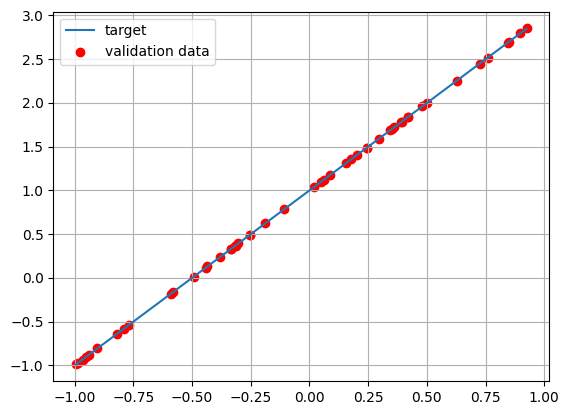

In [10]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [17]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [15]:
# get a summary of our composed model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [18]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7501 - mse: 2.7501 - val_loss: 1.8457 - val_mse: 1.8457
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9459 - mse: 1.9459 - val_loss: 1.3686 - val_mse: 1.3686
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4915 - mse: 1.4915 - val_loss: 1.0416 - val_mse: 1.0416
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0219 - mse: 1.0219 - val_loss: 0.8083 - val_mse: 0.8083
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8226 - mse: 0.8226 - val_loss: 0.6358 - val_mse: 0.6358
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6709 - mse: 0.6709 - val_loss: 0.5052 - val_mse: 0.5052
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5337 - mse: 0.5337 - val_loss: 0.4034 - val_mse: 0.4034
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4021 - mse: 0.4021 - val_loss: 0.3231 - val_mse: 0.3231
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3160 - mse

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [19]:
# return weights and biases
model.get_weights()

[array([[1.9084134]], dtype=float32), array([0.99881697], dtype=float32)]

In [20]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mse: 0.0026 

Test loss: 0.0026658063288778067
Test accuracy: 0.0026658063288778067


In [22]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mse: 0.0026 

Test loss: 0.0026658063288778067
Test accuracy: 0.0026658063288778067


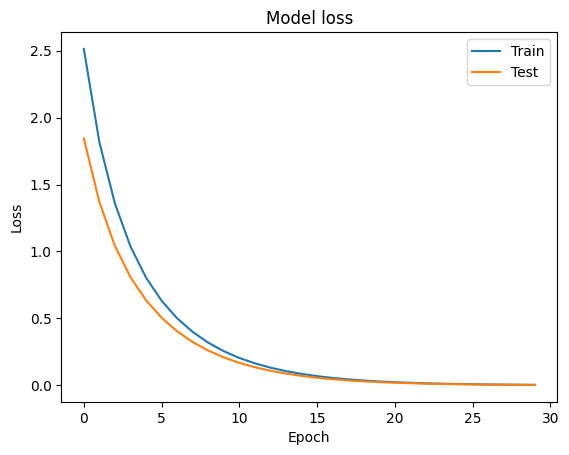

In [23]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


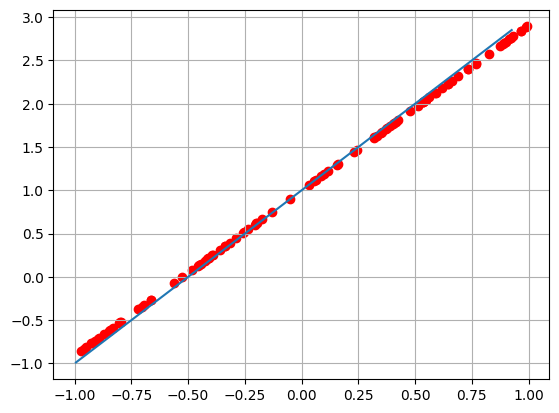

In [24]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [228]:
#libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

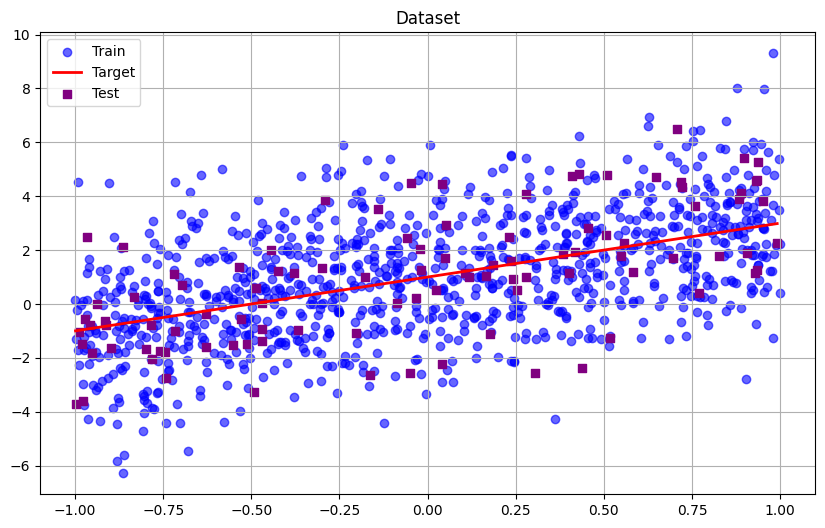

In [229]:
#parameters of f(x) = m*x + b
m = 2 #slope
b = 1 #intersect

#generate trainings and test inputs
np.random.seed(0)
n_valid = 100
x_train = np.random.uniform(-1, 1, n_valid*10)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = m * x_valid + b #target linear function

sigma = 2
y_train = np.random.normal(m * x_train + b, sigma) #actual measures 
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', marker='o', alpha=0.6, label='Train')
plt.plot(x_valid, y_target, color='red', label="Target", linewidth=2)
plt.scatter(x_valid, y_valid, color='purple', marker='s', label='Test') 
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

We have to optimize two parameters so we need a single neuron in a single hidden layer.

In [230]:
from tensorflow.keras.layers import Dense, Input

# Compose the NN model
model = tf.keras.Sequential()
model.add(Input(shape=(1,)))  # Usa un livello Input come primo livello
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# summary of our composed model
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

The training phase requires multiple iterations before reaching the optimal point of the cost function. An **epoch** denotes a single iteration during which the entire training dataset passes through the neural network. There is no fixed rule for the number of epochs; it is determined by running the script with different numbers of epochs to ascertain the optimal value that avoids both underfitting and overfitting. For this case, I choose $N_{epochs} = 30$.

Within each epoch, the dataset is processed in smaller subsets called **batches**. A **batch** represents a subgroup of training data used to update the parameters of the neural network. This approach helps prevent overfitting and improves the efficiency of reaching the minimum of the cost function. The **batch size** refers to the number of training data points included in each batch and is typically set as a power of 2 for computational efficiency.


In [231]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.1339 - mse: 6.1339 - val_loss: 5.5475 - val_mse: 5.5475
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2475 - mse: 5.2475 - val_loss: 4.7433 - val_mse: 4.7433
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7634 - mse: 4.7634 - val_loss: 4.2847 - val_mse: 4.2847
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0512 - mse: 4.0512 - val_loss: 3.9913 - val_mse: 3.9913
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9101 - mse: 3.9101 - val_loss: 3.7889 - val_mse: 3.7889
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9711 - mse: 3.9711 - val_loss: 3.6408 - val_mse: 3.6408
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1320 - mse: 4.1320 - val_loss: 3.5344 - val_mse: 3.5344
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9535 - mse: 3.9535 - val_loss: 3.4752 - val_mse: 3.4752
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9599 - mse: 

In [233]:
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

Optimized m =  1.9992996
Optimized b =  1.0387775


In [234]:
# evaluate model
score1 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=2)

4/4 - 0s - 8ms/step - loss: 3.2884 - mse: 3.2884
4/4 - 0s - 6ms/step - loss: 0.0015 - mse: 0.0015


In [235]:
# print performance
print()
print('"Test" loss:', score1[0])
print('"Test" accuracy:', score1[1])

print()
print('"Exact" loss:', score2[0])
print('"Exact" accuracy:', score2[1])


"Test" loss: 3.288398504257202
"Test" accuracy: 3.288398504257202

"Exact" loss: 0.0015060039004310966
"Exact" accuracy: 0.0015060039004310966


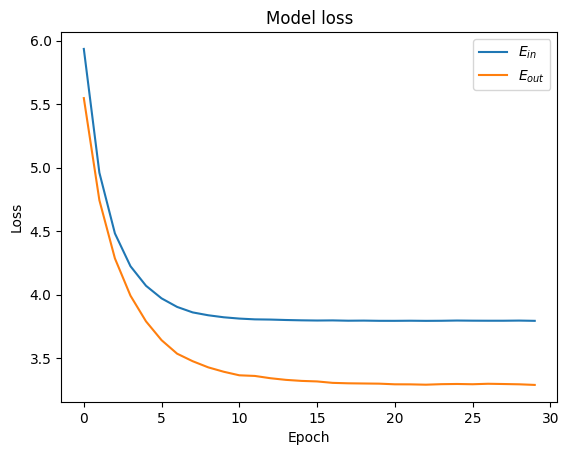

In [239]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


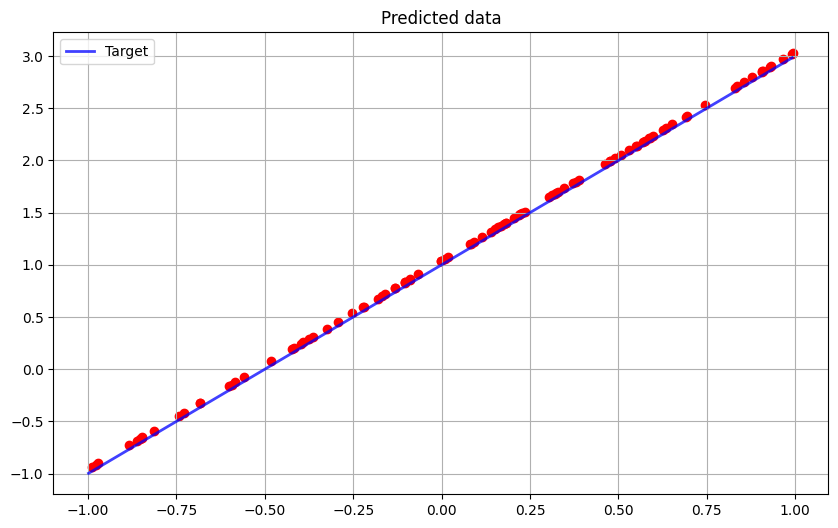

In [240]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='blue', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='red', marker='o')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers $N_L$
- the number of neurons in each layer $n$
- the activation function $F(z)$
- the optimizer $O$
- the loss function $C$
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Dataset
I set $N_{epochs}=80$, $N_{train}=5000$, $N_{test}=500$ and $\sigma=0.3$.

In [304]:
#libraries
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

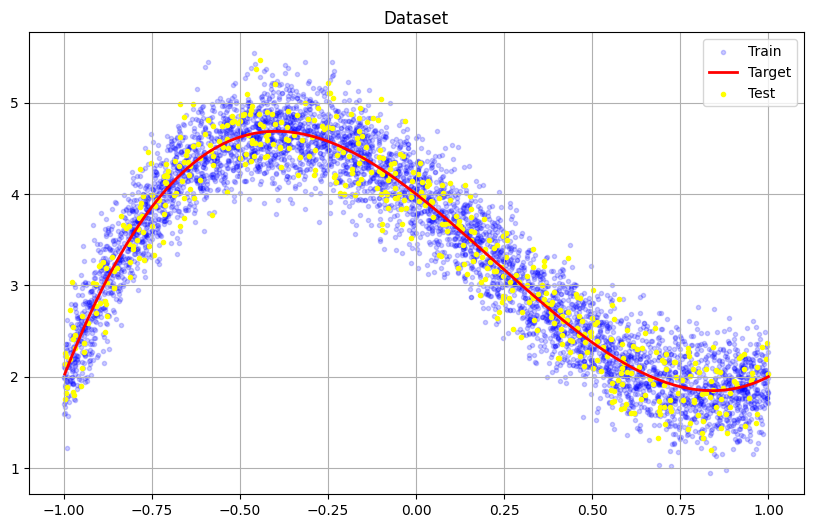

In [314]:
n_valid=500
n_train=10*n_valid
n_epochs=80
sigma=0.3

#parameters
a = 3
b = -2
c = -3
d = 4

# generate training and test inputs
np.random.seed(0)

x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = f(x_valid, a, b, c, d)

y_train = np.random.normal(f(x_train, a, b, c, d), sigma) 
y_valid = np.random.normal(f(x_valid, a, b, c, d), sigma)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', marker='.', alpha=0.2, label='Train')
plt.plot(x_valid, y_target, color='red', label="Target", linewidth=2)
plt.scatter(x_valid, y_valid, color='yellow', marker='.', label='Test')
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [315]:
'''import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

# Compose the NN model
model = Sequential()
model.add(Dense(100,input_shape=(1,),activation='relu'))
model.add(Dense(1,activation='relu'))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Summary of our composed model
model.summary()'''

"import tensorflow as tf\nfrom tensorflow.keras.layers import Dense, Input\n\n# Compose the NN model\nmodel = Sequential()\nmodel.add(Dense(100,input_shape=(1,),activation='relu'))\nmodel.add(Dense(1,activation='relu'))\n\n# Compile the model choosing optimizer, loss and metrics objects\nmodel.compile(optimizer='adam', loss='mse', metrics=['mse'])\n\n# Summary of our composed model\nmodel.summary()"

In [319]:
#now, we create the model
model = Sequential()
model.add(Dense(10,input_shape=(1,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

The code constructs a neural network comprising five dense hidden layers, each with 4 neurons, and an output layer with a single neuron. It employs the ReLU activation function and uses the SGD optimizer for training, with MSE serving as both the loss function and evaluation metric.

In [320]:
#now we train the model
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# evaluate model - with validation data
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with validation data---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model - with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with the exact curve---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4674 - mse: 2.4674 - val_loss: 0.2836 - val_mse: 0.2836
Epoch 2/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.2274 - mse: 0.2274 - val_loss: 0.2178 - val_mse: 0.2178
Epoch 3/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1322 - mse: 0.1322 - val_loss: 0.1303 - val_mse: 0.1303
Epoch 4/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1091 - mse: 0.1091 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 5/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0999 - mse: 0.0999 - val_loss: 0.0984 - val_mse: 0.0984
Epoch 6/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0958 - mse: 0.0958 - val_loss: 0.0947 - val_mse: 0.0947
Epoch 7/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0948 - mse: 0.0948 - val_loss: 0.1135 - val_mse: 0.1135
Epoch 8/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 9/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

In [309]:
'''# return weights and biases
#par = model.get_weights() #m, b
#print('------PARAMETERS------\n',par,'\n')'''

"# return weights and biases\n#par = model.get_weights() #m, b\n#print('------PARAMETERS------\n',par,'\n')"

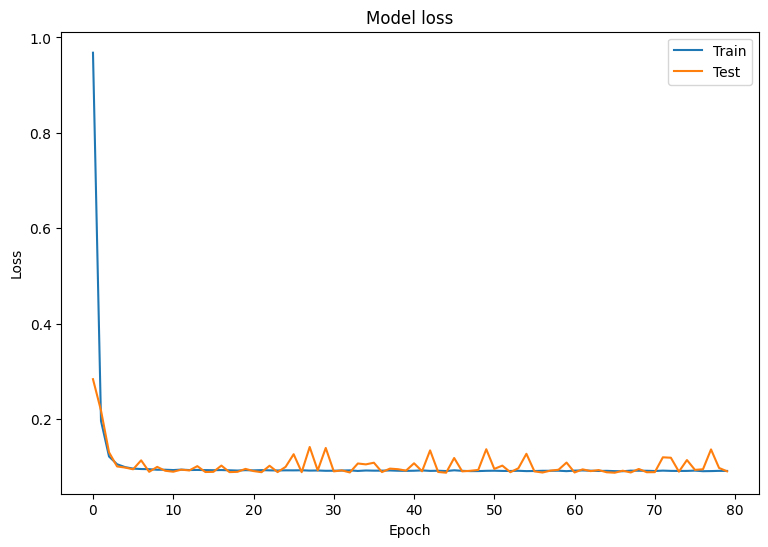

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


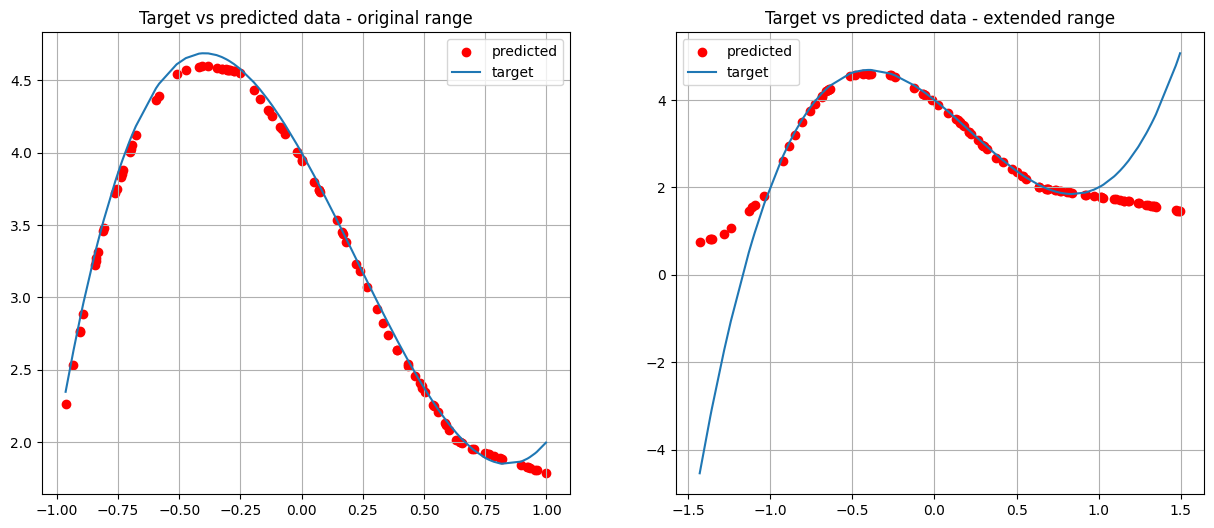

In [321]:
# Plot training & validation loss values over time
plt.figure(figsize=(9,6))
plt.title('Loss function over time')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#make predictions
x_predicted = np.random.uniform(-1., 1., 100)
x_predicted_ext = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
x_predicted_ext.sort()
y_predicted = model.predict(x_predicted)
y_predicted_ext = model.predict(x_predicted_ext)

#print prediction vs target
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Target vs predicted data - original range')
plt.scatter(x_predicted, y_predicted,color='r',label='predicted')
plt.plot(x_predicted, f(x_predicted,a,b,c,d),label='target')
plt.grid(True)
plt.legend()
plt.subplot(122)
plt.title('Target vs predicted data - extended range')
plt.scatter(x_predicted_ext, y_predicted_ext,color='r',label='predicted')
plt.plot(x_predicted_ext, f(x_predicted_ext,a,b,c,d),label='target')
plt.grid(True)
plt.legend()
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def sinsq(x,y): #target function
    return np.sin(x*x+y*y)

x = np.linspace(-1.5,1.5,50)
y = x
X,Y = np.meshgrid(x,y)
Z = sinsq(X,Y)

In [42]:
# generate a Dataset
#we need a vector of 2D points: represented as a ntrainX2 matrix ((x,y) for each element)

n_train = 10000
n_valid = int(n_train/10)
sigma = 0.2

#training data
x0_train = np.random.uniform(-1.5,1.5,n_train)
x1_train = np.random.uniform(-1.5,1.5,n_train)

x_train = np.column_stack((x0_train,x1_train))

y_train = np.random.normal(sinsq(x0_train,x1_train),sigma)

#validation data
x0_valid = np.random.uniform(-1.5,1.5,n_valid)
x1_valid = np.random.uniform(-1.5,1.5,n_valid)

x_valid = np.column_stack((x0_valid,x1_valid))

y_valid = np.random.normal(sinsq(x0_valid,x1_valid),sigma)

(1000,) (1000,) (1000,)


Text(0.5, 0, 'z')

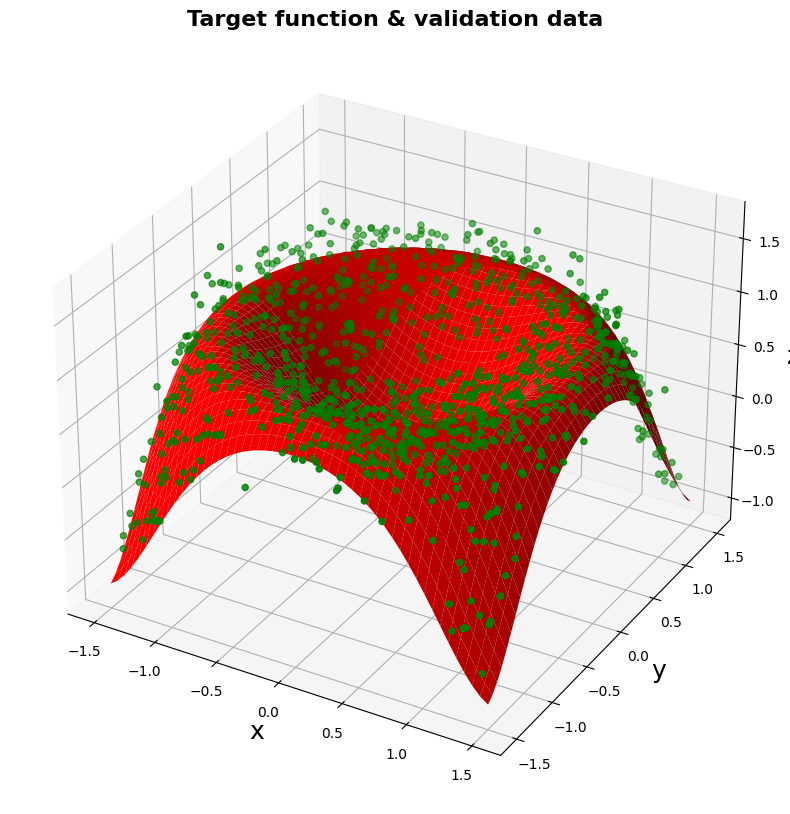

In [43]:

#graphing the target function and the validation points
xdata = x_valid.T[0]
ydata = x_valid.T[1]
zdata = y_valid

print(xdata.shape,ydata.shape,zdata.shape)

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                color='r',edgecolor='none',label='Target function')
                #cmap='coolwarm', edgecolor='none')
ax.scatter3D(xdata, ydata, np.resize(zdata,(n_valid,)), color='green',marker='o',label='validation data')
ax.set_title('Target function & validation data',fontweight='bold',fontsize=16)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
#ax.legend()

In [44]:
#building the model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()
model.add(Dense(35, input_shape=(2,), activation='relu')) #input_shape now takes 2 input parameters (x, y)
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 35)             │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 20)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,546 (6.04 KB)

 Trainable params: 1,546 (6.04 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=100, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4250 - mse: 0.4250 - val_loss: 0.1802 - val_mse: 0.1802
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1805 - mse: 0.1805 - val_loss: 0.1767 - val_mse: 0.1767
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1695 - mse: 0.1695 - val_loss: 0.1743 - val_mse: 0.1743
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1730 - mse: 0.1730 - val_loss: 0.1714 - val_mse: 0.1714
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1672 - mse: 0.1672 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.1666 - val_mse: 0.1666
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.1637 - val_mse: 0.1637
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1681 - mse: 0.1681 - val_loss: 0.1612 - val_mse: 0.1612
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [46]:
#evaluation
# evaluate model - with validation data
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with validation data---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model - with the exact curve
y_target=sinsq(x0_valid,x1_valid)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with the exact curve---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0521 - mse: 0.0521  

---Evaluation with validation data---
 Test loss: 0.05388622730970383
Test accuracy: 0.05388622730970383
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.0121 - mse: 0.0121

---Evaluation with the exact curve---
 Test loss: 0.011617938987910748
Test accuracy: 0.011617938987910748


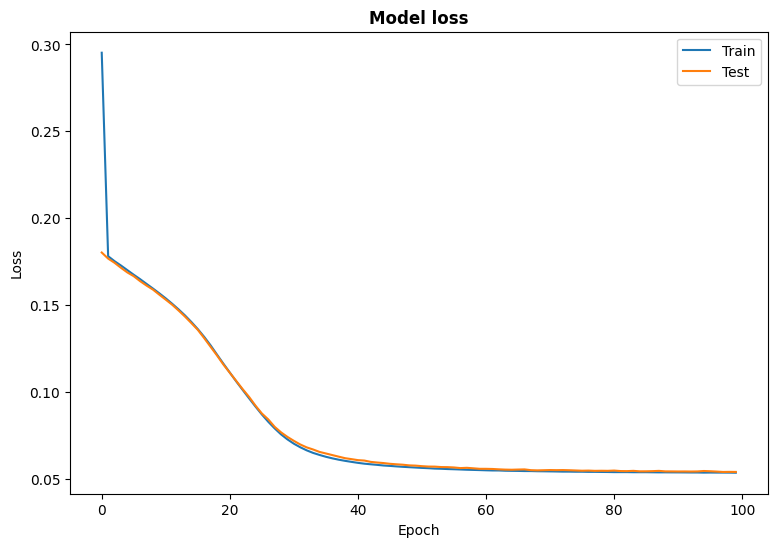

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


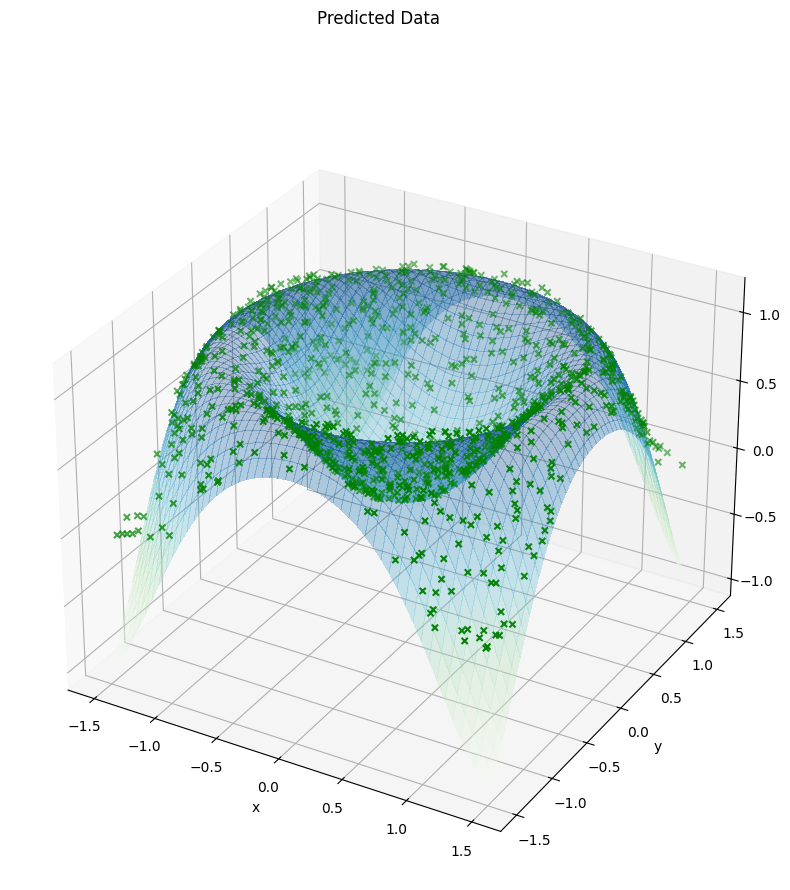

In [51]:
# Plot training & validation loss values over time
plt.figure(figsize=(9,6))
plt.title('Loss function over time')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss',fontweight='bold')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#make and plot prediction
xy_predicted = np.zeros((n_valid, 2))
xy_predicted[:, 0] = np.random.uniform(-1.5, 1.5, n_valid)
xy_predicted[:, 1] = np.random.uniform(-1.5, 1.5, n_valid)

# Predict the output
z_predicted = np.zeros(n_valid)
z_predicted = model.predict(xy_predicted)
z_predicted = z_predicted.flatten()

# Create a mesh grid for plotting the true function surface
X = np.linspace(-1.5, 1.5, 100)
Y = np.linspace(-1.5, 1.5, 100)
X.sort()
Y.sort()
X, Y = np.meshgrid(X, Y)
Z = sinsq(X, Y)

# Plot the data
fig = plt.figure(figsize=(13, 10))
plt.suptitle("Predicted Data")
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='GnBu', linewidth=0, antialiased=False, alpha=0.3)
ax.scatter(xy_predicted[:, 0], xy_predicted[:, 1], z_predicted, c='g', marker='x', s=20, label='Predicted Points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#plt.plot(z_predicted)
plt.show()
